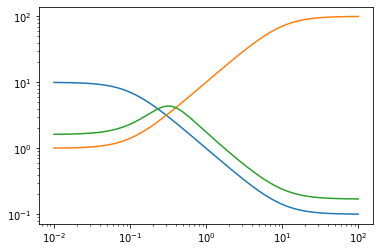

In [1]:
import kontrol
import control
import numpy as np
import matplotlib.pyplot as plt
import kontrol.frequency_series.noise_models

# lvdt_noise = kontrol.core.frequency_series.noise_models()
# lpf = control.tf([1], [1, 1])
# hpf = 1 - lpf
omega = np.logspace(-2,2,1000)
f = omega/2/np.pi
# lvdt_noise = kontrol.core.frequency_series.noise_models.lvdt_noise(f=f)
# geophone_noise = kontrol.core.frequency_series.noise_models.geophone_noise(f=f)
tf_noise1 = control.tf([1/10, 1], [1/0.1, 1]) *10
tf_noise2 = control.tf([1/0.1, 1], [1/10, 1]) 

comp = kontrol.ComplementaryFilter(noise1=tf_noise1, noise2=tf_noise2)
comp.hinfsynthesis()
comp.f = f

plt.loglog(omega, comp.noise1)
plt.loglog(omega, comp.noise2)
plt.loglog(omega, comp.noise_super)

# comp = cm.ComplementaryFilter(noise1=lvdt_noise, noise2=geophone_noise, f=f, unit="omega")

# plt.loglog(omega, lvdt_noise)
# plt.loglog(omega, geophone_noise)
# plt.loglog(omega, abs(lpf(1j*omega)))
# plt.loglog(omega, abs(hpf(1j*omega)))

In [30]:
comp.noise_super[400:600]

array([4.11535263, 4.09580053, 4.07565869, 4.05494934, 4.03369502,
       4.01191847, 3.98964265, 3.96689057, 3.94368531, 3.92004993,
       3.89600741, 3.87158059, 3.84679215, 3.82166452, 3.79621988,
       3.77048008, 3.74446663, 3.71820064, 3.69170283, 3.66499344,
       3.63809228, 3.61101863, 3.5837913 , 3.55642855, 3.5289481 ,
       3.50136712, 3.47370225, 3.44596954, 3.41818448, 3.39036199,
       3.36251644, 3.3346616 , 3.30681071, 3.27897643, 3.2511709 ,
       3.22340569, 3.19569184, 3.16803987, 3.14045979, 3.11296111,
       3.08555284, 3.05824352, 3.0310412 , 3.00395352, 2.97698765,
       2.95015034, 2.92344794, 2.89688638, 2.87047124, 2.8442077 ,
       2.81810059, 2.7921544 , 2.7663733 , 2.74076113, 2.71532142,
       2.69005745, 2.66497216, 2.64006828, 2.61534826, 2.59081431,
       2.5664684 , 2.5423123 , 2.51834757, 2.49457555, 2.4709974 ,
       2.44761412, 2.42442651, 2.40143522, 2.37864077, 2.35604349,
       2.33364362, 2.31144125, 2.28943633, 2.26762874, 2.24601

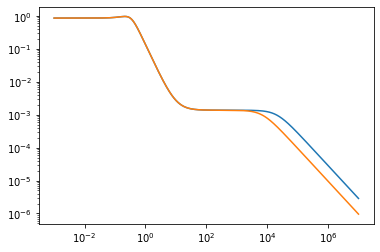

In [28]:
new_omega = np.logspace(-3, 7, 1000000)
# plt.loglog(comp.omega, abs(comp.filter1(1j*comp.omega)))
plt.loglog(new_omega, abs(comp.filter2(1j*new_omega)))
# plt.loglog(omega, abs(tf_travis(1j*omega)))
plt.loglog(new_omega, abs((1-tf_travis)(1j*new_omega)))
# tf_travis.pole()

In [2]:
tf_correct = control.tf([1, 2.08392466e+04, 1.58200377e+04, 2.53883414e+03, 1.16522184e+02], [1, 2.08679038e+04, 1.64005175e+04, 5.55127674e+03, 8.50146586e+02])
import kontrol.core.controlutils

kontrol.core.controlutils.check_tf_equal(tf_correct, comp[0, 0], allclose_kwargs={"rtol":1e-4})

True

In [8]:
tf_travis=control.tf([1.00000000e+00, 6.96103440e+03, 5.28422768e+03, 8.48018504e+02,3.89205080e+01], [1.00000000e+00, 6.97060626e+03, 5.47811529e+03, 1.85421249e+03,2.83960156e+02])

In [19]:
?kontrol.core.controlutils.check_tf_equal

In [25]:
tf_correct.dcgain()

0.13706128556987465

In [26]:
tf_travis.pole()

array([-6.96982032e+03+0.j        , -3.61929037e-01+0.j        ,
       -2.12004669e-01+0.26004107j, -2.12004669e-01-0.26004107j])

In [16]:
comp[0, 0].pole()

array([-2.08671178e+04+0.j        , -3.61926016e-01+0.j        ,
       -2.12005766e-01+0.26003975j, -2.12005766e-01-0.26003975j])

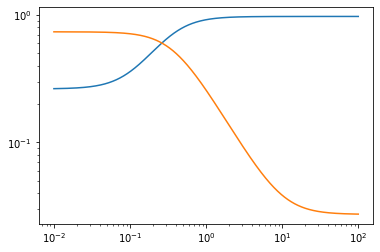

In [14]:
import kontrol.core.complementary_filter.synthesis

h1, h2 = kontrol.core.complementary_filter.synthesis.hinfcomplementary(tf_noise1, tf_noise2)

plt.loglog(omega, abs(h1(1j*omega)))
plt.loglog(omega, abs(h2(1j*omega)))

In [3]:
comp.noise1

array([9.9019802 -0.98019802j, 9.90017443-0.98909455j,
       9.89833573-0.99806844j, 9.89646353-1.00712027j,
       9.89455722-1.01625062j, 9.8926162 -1.02546007j,
       9.89063984-1.0347492j , 9.88862753-1.0441186j ,
       9.88657861-1.05356885j, 9.88449245-1.06310054j,
       9.88236838-1.07271426j, 9.88020572-1.08241059j,
       9.8780038 -1.09219014j, 9.87576192-1.10205348j,
       9.87347938-1.1120012j , 9.87115545-1.12203391j,
       9.86878941-1.13215219j, 9.86638052-1.14235664j,
       9.86392802-1.15264784j, 9.86143114-1.16302639j,
       9.85888911-1.17349289j, 9.85630113-1.18404792j,
       9.85366639-1.19469208j, 9.85098409-1.20542596j,
       9.84825339-1.21625015j, 9.84547344-1.22716523j,
       9.84264338-1.2381718j , 9.83976235-1.24927045j,
       9.83682945-1.26046176j, 9.83384378-1.27174632j,
       9.83080443-1.2831247j , 9.82771047-1.29459749j,
       9.82456095-1.30616527j, 9.82135492-1.31782861j,
       9.81809139-1.32958809j, 9.81476938-1.34144427j,
       9.8

In [4]:
comp.tf_noise1


 s + 10
--------
10 s + 1

In [2]:
comp.noise1

In [12]:
comp[0, 0]


    -19.33 s^3 - 103.7 s^2 - 20.15 s - 0.9979
------------------------------------------------
s^4 + 0.8683 s^3 + 0.3569 s^2 + 0.08454 s + 0.01

In [8]:
tf_noise1 = control.tf([1/10, 1], [1/0.1, 1]) *10
tf_noise2 = control.tf([1/0.1, 1], [1/10, 1]) 

comp = cm.ComplementaryFilter(noise1=tf_noise1, noise2=tf_noise2)
comp.h2synthesis()


plt.loglog(omega, abs(tf_noise1(omega*1j)))
plt.loglog(omega, abs(tf_noise2(omega*1j)))

AttributeError: 'ComplementaryFilter' object has no attribute 'omega'

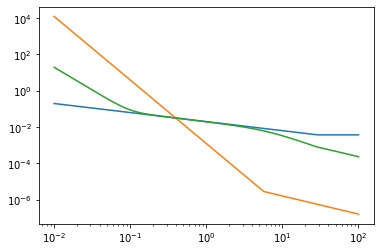

In [9]:
plt.loglog(omega, lvdt_noise)
plt.loglog(omega, geophone_noise)
plt.loglog(omega, comp.noise_super)
# plt.loglog(omega, abs(lpf(1j*omega)))
# plt.loglog(omega, abs(hpf(1j*omega)))

In [6]:
comp.noise_super

array([1.97925344e+01, 1.93415923e+01, 1.89009256e+01, 1.84703002e+01,
       1.80494872e+01, 1.76382632e+01, 1.72364095e+01, 1.68437128e+01,
       1.64599643e+01, 1.60849602e+01, 1.57185013e+01, 1.53603929e+01,
       1.50104447e+01, 1.46684708e+01, 1.43342894e+01, 1.40077231e+01,
       1.36885984e+01, 1.33767456e+01, 1.30719992e+01, 1.27741971e+01,
       1.24831812e+01, 1.21987969e+01, 1.19208931e+01, 1.16493221e+01,
       1.13839396e+01, 1.11246046e+01, 1.08711794e+01, 1.06235293e+01,
       1.03815227e+01, 1.01450311e+01, 9.91392880e+00, 9.68809299e+00,
       9.46740371e+00, 9.25174370e+00, 9.04099838e+00, 8.83505577e+00,
       8.63380646e+00, 8.43714352e+00, 8.24496246e+00, 8.05716118e+00,
       7.87363988e+00, 7.69430106e+00, 7.51904943e+00, 7.34779189e+00,
       7.18043742e+00, 7.01689712e+00, 6.85708410e+00, 6.70091342e+00,
       6.54830213e+00, 6.39916913e+00, 6.25343517e+00, 6.11102283e+00,
       5.97185644e+00, 5.83586205e+00, 5.70296739e+00, 5.57310187e+00,
      

In [7]:
?kontrol.core.frequency_series.noise_models.lvdt_noise